In [2]:
import datetime

import pandas as pd
import numpy as np

import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('./output/v2.csv', index_col=0)
df.head()

,date,quantity,suppliers_currency,transformer_unit_price,dry_or_oil,rated_power_kVA,primary_winding,secondary_winding,no_load_loss,full_load_loss_75,full_load_loss_120,rated_volt_primary_side
0,2021-04-28,6.0,EUR,708000.0,Oil,19080.0,Copper,Copper,19002.544911,150154.155650,187698.233981,33000.0
3,2023-03-14,4.0,EUR,235000.0,Oil,11000.0,Copper,Copper,11825.516231,89149.546166,108715.888044,20000.0
8,2021-09-30,5.0,EUR,267000.0,Oil,12000.0,Copper,Copper,8000.000000,138000.000000,146000.000000,21000.0
9,2021-09-30,5.0,EUR,267000.0,Oil,12000.0,Copper,Copper,8000.000000,138000.000000,146000.000000,24000.0
10,2020-12-02,1.0,EUR,56200.0,Dry,5000.0,Aluminum,Aluminum,5000.000000,53043.000000,61000.000000,11000.0


In [4]:
df = pd.get_dummies(
    df, columns=['dry_or_oil', 'primary_winding', 'secondary_winding']
).copy()

In [6]:
df[['primary_winding_Copper', 'secondary_winding_Copper']].corr()

,primary_winding_Copper,secondary_winding_Copper
primary_winding_Copper,1.000000,0.784597
secondary_winding_Copper,0.784597,1.000000


In [82]:
# df['primary_winding_Copper'] = df['primary_winding_Copper'].astype(int)
# df['primary_material_price'] = np.log(df['primary_winding_Copper'] * df['copper_price_per_kg'] + (1 - df['primary_winding_Copper']) * df['alu_price_per_kg'])

chosen_columns = [
    # 'quantity',
    'rated_power_kVA', 
    # 'no_load_loss', 
    #'log_no_load_loss',
    # 'full_load_loss_75',
    # 'full_load_loss_120',
    'rated_volt_primary_side',
    'dry_or_oil_Dry',
    'dry_or_oil_Oil',
    'primary_winding_Aluminum',
    'primary_winding_Copper',
    # 'secondary_winding_Aluminum',
    # 'secondary_winding_Copper',
    # 'primary_material_price'
]

y = df['transformer_unit_price']
# y = df['transformer_unit_price'] / df['transformer_unit_price'].mean()
X = df[chosen_columns].astype(float)
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     transformer_unit_price   R-squared:                       0.501
Model:                                OLS   Adj. R-squared:                  0.481
Method:                     Least Squares   F-statistic:                     24.82
Date:                    Sat, 19 Oct 2024   Prob (F-statistic):           3.03e-14
Time:                            09:01:05   Log-Likelihood:                -1373.6
No. Observations:                     104   AIC:                             2757.
Df Residuals:                          99   BIC:                             2770.
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [9]:
df['year'] = df['date'].apply(lambda x: datetime.datetime.fromisoformat(x).year)
df['month'] = df['date'].apply(lambda x: datetime.datetime.fromisoformat(x).month)

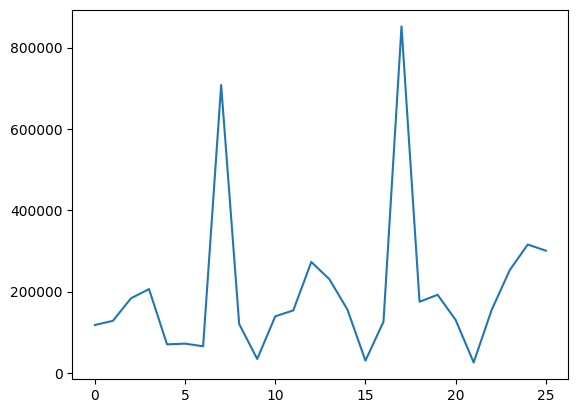

In [10]:
plt.plot(pd.DataFrame(df.groupby(['year', 'month'])['transformer_unit_price'].mean()).reset_index(drop=True))